In [1]:
#libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_row', None)

In [2]:
data1 = pd.read_csv('train.csv')
data2 = pd.read_csv('test.csv')
data3 = pd.read_csv('Exam_Score_Prediction.csv')

train_df = data1.copy()
test_df = data2.copy()
previous_df = data3.copy()

print("First 5 rows of train data: \n", train_df.head())
print("First 5 rows of test data: \n", test_df.head())

First 5 rows of train data: 
    id  age  gender   course  study_hours  class_attendance internet_access  \
0   0   21  female     b.sc         7.91              98.8              no   
1   1   18   other  diploma         4.95              94.8             yes   
2   2   20  female     b.sc         4.68              92.6             yes   
3   3   19    male     b.sc         2.00              49.5             yes   
4   4   23    male      bca         7.65              86.9             yes   

   sleep_hours sleep_quality   study_method facility_rating exam_difficulty  \
0          4.9       average  online videos             low            easy   
1          4.7          poor     self-study          medium        moderate   
2          5.8          poor       coaching            high        moderate   
3          8.3       average    group study            high        moderate   
4          9.6          good     self-study            high            easy   

   exam_score  
0        7

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                630000 non-null  int64  
 1   age               630000 non-null  int64  
 2   gender            630000 non-null  object 
 3   course            630000 non-null  object 
 4   study_hours       630000 non-null  float64
 5   class_attendance  630000 non-null  float64
 6   internet_access   630000 non-null  object 
 7   sleep_hours       630000 non-null  float64
 8   sleep_quality     630000 non-null  object 
 9   study_method      630000 non-null  object 
 10  facility_rating   630000 non-null  object 
 11  exam_difficulty   630000 non-null  object 
 12  exam_score        630000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ MB


In [4]:
num = train_df.select_dtypes(include='number')
cat = train_df.select_dtypes(exclude='number')

In [5]:
num = num.drop(columns='id')

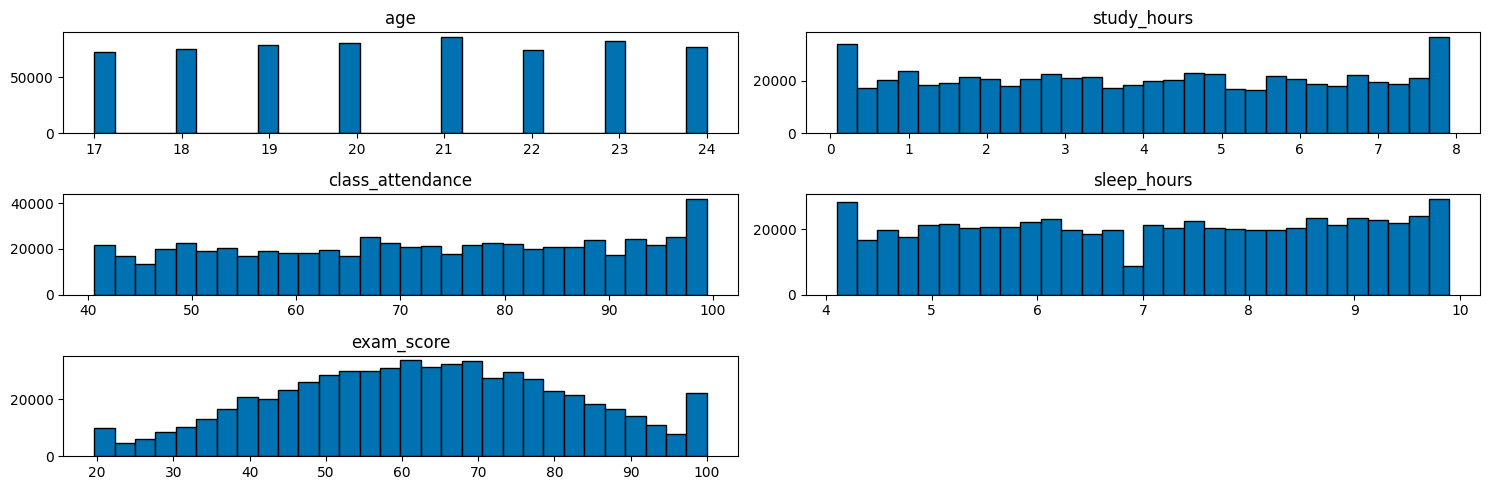

In [6]:
#plot numerical features

color = '#0072B2'

# grid size
nrows, ncols = 5, 2

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 8))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(num.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(num.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(num.columns[i])

plt.tight_layout()
plt.show()


KeyboardInterrupt: 

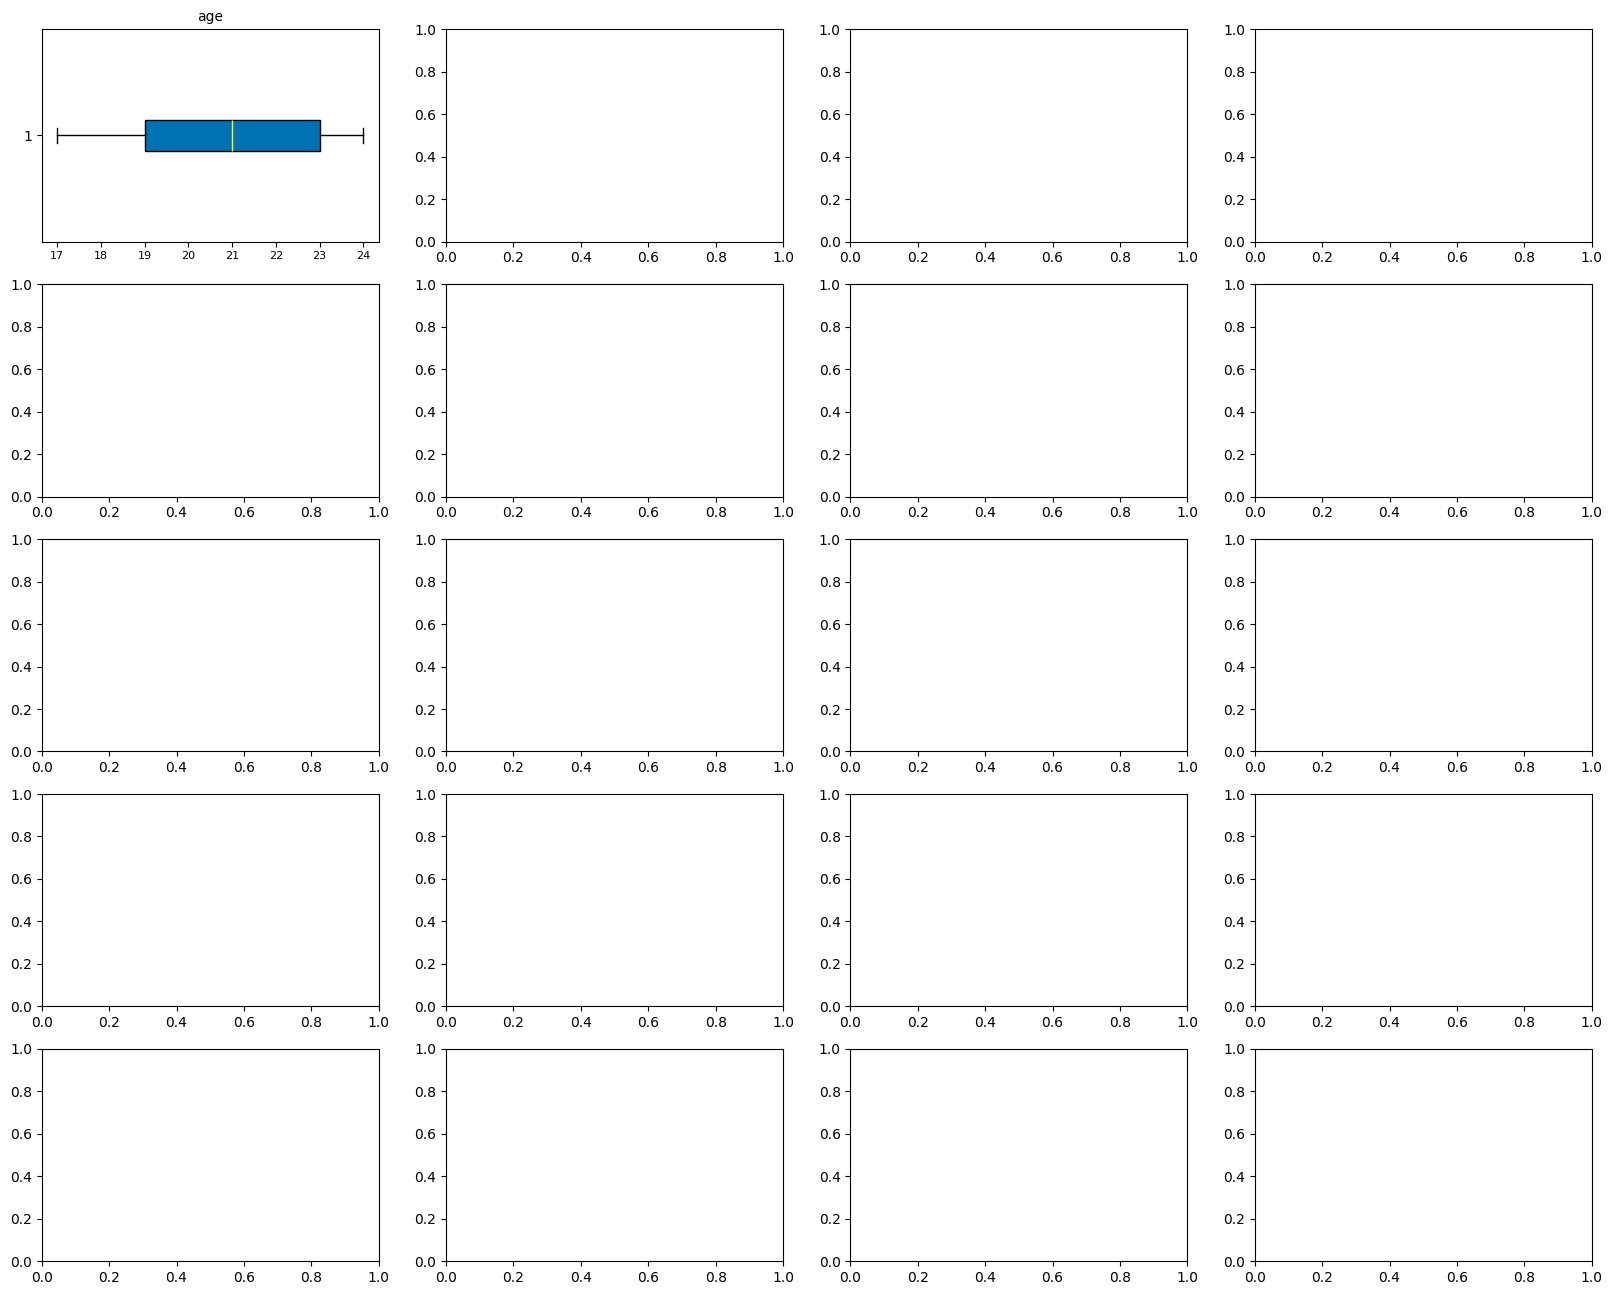

In [7]:
#boxplot numerical features

color = '#0072B2'

# grid size
nrows, ncols = 5, 4 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(num.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(num.iloc[:, i].dropna(), vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(num.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()


In [ ]:
train_df.head()

,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy,78.3
1,1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate,46.7
2,2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate,99.0
3,3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate,63.9
4,4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy,100.0


In [ ]:
cat.columns

Index(['gender', 'course', 'internet_access', 'sleep_quality', 'study_method',
       'facility_rating', 'exam_difficulty'],
      dtype='object')

In [ ]:
#grouping data per study_method to visualize what method has the highest mean score

method_group = train_df.groupby('study_method')['exam_score'].mean()

method_group = method_group.reset_index()

In [ ]:
method_group

,study_method,exam_score
0,coaching,69.266665
1,group study,60.531838
2,mixed,65.101735
3,online videos,59.727607
4,self-study,57.700155


In [ ]:
sleep_map = {
    "poor": 0,
    "average": 1,
    "good": 2

}

facility_map = {
    "low": 0,
    "medium": 1,
    "high": 2
}

difficulty_map = {
    "hard": 0,
    "moderate": 1,
    "easy": 2
}

method_map = {
    "self-study": 0,
    "online videos": 1,
    "group study": 2,
    "mixed": 3,
    "coaching": 4
}

train_df['sleep_quality'] = train_df['sleep_quality'].map(sleep_map)
test_df['sleep_quality'] = test_df['sleep_quality'].map(sleep_map)

train_df['facility_rating'] = train_df['facility_rating'].map(facility_map)
test_df['facility_rating'] = test_df['facility_rating'].map(facility_map)

train_df['exam_difficulty'] = train_df['exam_difficulty'].map(difficulty_map)
test_df['exam_difficulty'] = test_df['exam_difficulty'].map(difficulty_map)

train_df['study_method'] = train_df['study_method'].map(method_map)
test_df['study_method'] = test_df['study_method'].map(method_map)

In [ ]:
#dropping course

train_df = train_df.drop(columns='course')
test_df = test_df.drop(columns='course')

In [ ]:
gender_map = {
    "other": "female",
    "male": "male",
    "female": "female"
}

train_df['gender'] = train_df['gender'].map(gender_map)
test_df['gender'] = test_df['gender'].map(gender_map)

In [ ]:
train_df_encoded = pd.get_dummies(train_df, columns=['gender', 'internet_access'], drop_first= True)
test_df_encoded = pd.get_dummies(test_df, columns=['gender', 'internet_access'], drop_first= True)

In [ ]:
#target to the right

target_placeholder = train_df.pop('exam_score')

train_df_encoded['exam_score'] = target_placeholder

In [ ]:
num = train_df_encoded.select_dtypes(include='number')

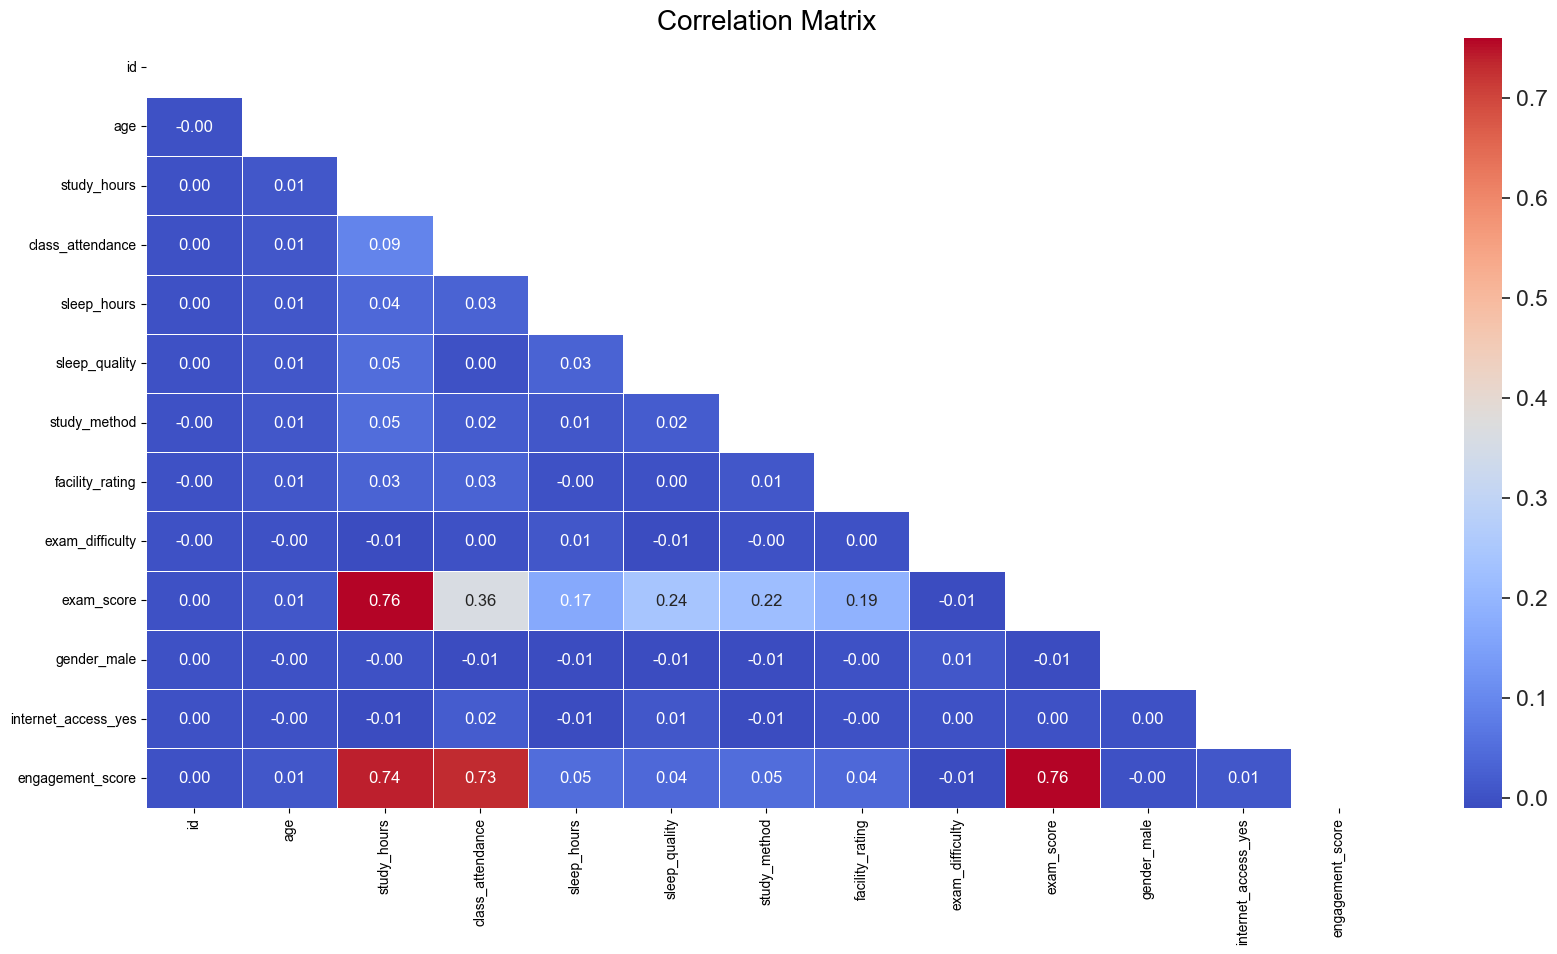

Features to consider removing: {'facility_rating', 'study_method', 'sleep_hours', 'study_hours', 'exam_score', 'age', 'exam_difficulty', 'engagement_score', 'class_attendance', 'sleep_quality'}


In [ ]:
num_corr = round(train_df_encoded.corr(), 2)

# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(20, 10))
sns.set_theme(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

#high correlated features
high_corr_features = set()
for i in range(len(num.columns)):
    for j in range(i):
        if abs(num.iloc[i, j]) > 0.8:
            colname = num.columns[i]
            high_corr_features.add(colname)

print(f"Features to consider removing: {high_corr_features}")


In [ ]:
#train test split

from sklearn.model_selection import train_test_split

X = train_df_encoded.drop(columns='exam_score')
y = train_df_encoded['exam_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
#regression issues

def train_and_eval_models(X_train, X_test, y_train, y_test):

    #models to test
    models = {
        "Linear Regression" : LinearRegression(),
        "Random Forest" : RandomForestRegressor(),
        "XGB" : XGBRegressor()
    }

    print("Starting the training process.")

    #list to store results

    results = []

    #scaling data just for LogisticRegression

    for name, model in models.items():
        print(f"Training model: {name}")

        model.fit(X_train, y_train)

        y_train_predict = model.predict(X_train)
        y_test_predict = model.predict(X_test)

        results.append({
            "Model": name,
            "Train MAE": mean_absolute_error(y_train, y_train_predict),
            "Test MAE": mean_absolute_error(y_test, y_test_predict),
            "Train RMSE": np.sqrt(mean_squared_error(y_train, y_train_predict)),
            "Test RMSE": np.sqrt(mean_squared_error(y_test, y_test_predict)),
            "Train R2": r2_score(y_train, y_train_predict),
            "Test R2": r2_score(y_test, y_test_predict)
        })

    # Converting results into a DataFrame
    results_df = pd.DataFrame(results)

    print("\nModel Performance Summary:")
    print(results_df)

    return results_df, model

In [ ]:
results_df, model = train_and_eval_models(X_train, X_test, y_train, y_test)

print(results_df)

Starting the training process.
Training model: Linear Regression
Training model: Random Forest
Training model: XGB

Model Performance Summary:
               Model  Train MAE  Test MAE  Train RMSE  Test RMSE  Train R2  \
0  Linear Regression   7.164899  7.145918    8.972281   8.946793  0.775466   
1      Random Forest   2.688528  7.242351    3.406266   9.091778  0.967638   
2                XGB   6.895338  7.023388    8.651482   8.805165  0.791235   

    Test R2  
0  0.775317  
1  0.767976  
2  0.782374  
               Model  Train MAE  Test MAE  Train RMSE  Test RMSE  Train R2  \
0  Linear Regression   7.164899  7.145918    8.972281   8.946793  0.775466   
1      Random Forest   2.688528  7.242351    3.406266   9.091778  0.967638   
2                XGB   6.895338  7.023388    8.651482   8.805165  0.791235   

    Test R2  
0  0.775317  
1  0.767976  
2  0.782374  


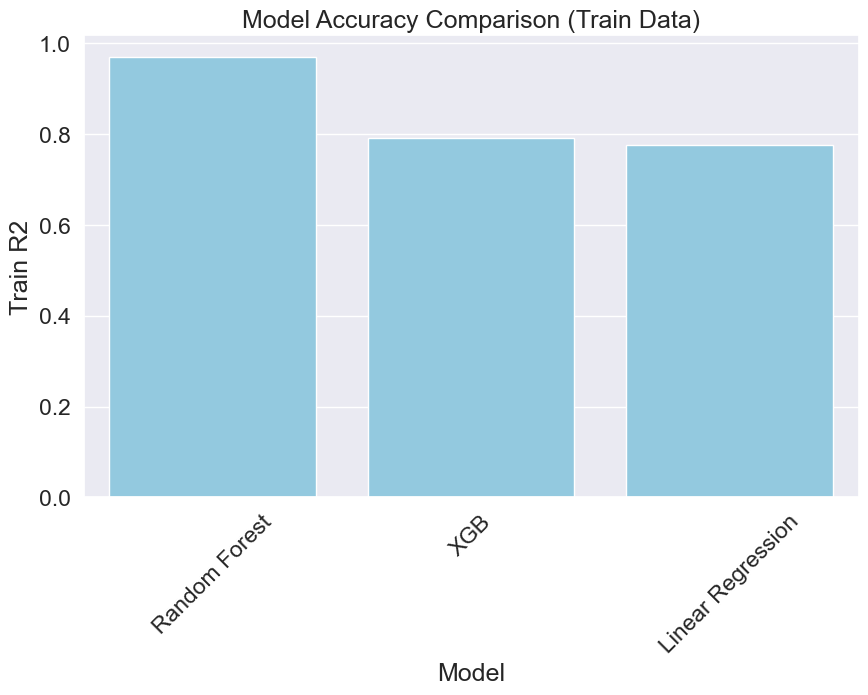

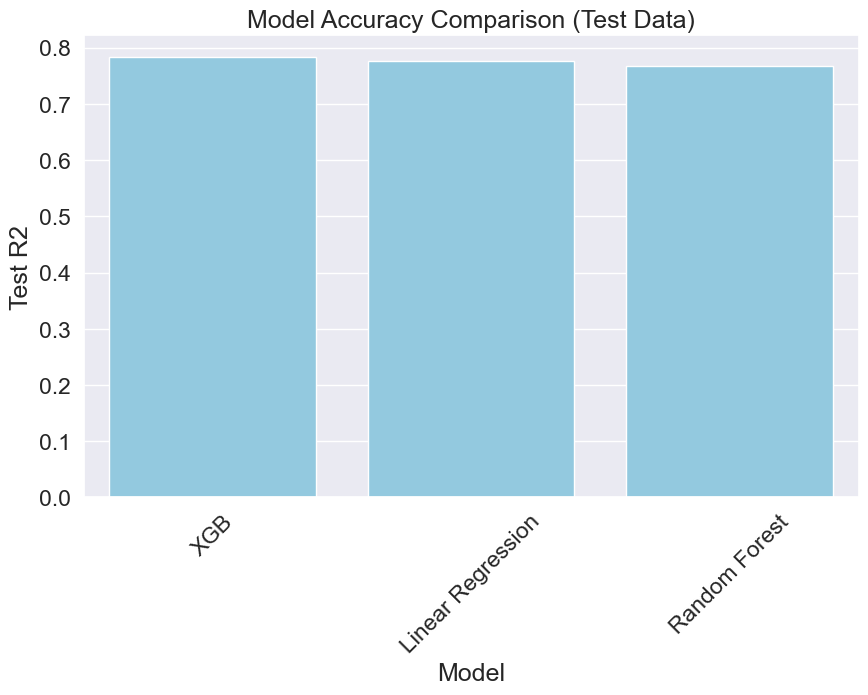

In [ ]:
#plotting the results

plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Train R2", data=results_df.sort_values(by='Train R2', ascending=False), color='skyblue')
plt.title("Model Accuracy Comparison (Train Data)")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Test R2", data=results_df.sort_values(by='Test R2', ascending=False), color='skyblue')
plt.title("Model Accuracy Comparison (Test Data)")
plt.xticks(rotation=45)
plt.show()